<a href="https://colab.research.google.com/github/mdsahilkhan2001/web-scraping-/blob/main/KIAweb_scraping_Miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd



In [2]:
def get_car_colors(url):
    # Send a GET request to the URL
    response = requests.get(url)

In [10]:
url = ' https://www.cars24.com/buy-used-car?f=make%3A%3D%3Akia&sort=P&serveWarrantyCount=true&gaId=894010475.1720191412&listingSource=TabFilter&storeCityId=2378'
headers = {'User-Agent': 'Mozilla/5.0'}

In [11]:
response = requests.get(url, headers=headers)
response.status_code  # Should be 200 if the request was successful


200

In [12]:
soup = BeautifulSoup(response.content, 'html.parser')


In [13]:
car_listings = soup.find_all('h3', class_='_11dVb')



In [14]:
len(car_listings)  # Output the number of car listings found

5

In [15]:
car_listings


[<h3 class="_11dVb">2020 KIA SONET GTX PLUS 1.0 IMT</h3>,
 <h3 class="_11dVb">2020 KIA SELTOS GTX PLUS DCT 1.4 PETROL</h3>,
 <h3 class="_11dVb">2021 KIA SONET HTK PLUS 1.2</h3>,
 <h3 class="_11dVb">2021 KIA SONET HTX 1.5</h3>,
 <h3 class="_11dVb">2021 KIA SELTOS GTX PLUS DCT 1.4 PETROL</h3>]

In [16]:
 def get_details(soup):
    name_elements = soup.find_all('h3', {'class': '_11dVb'})
    transmission_elements = soup.find_all('ul', {'class': '_3J2G-'})
    km_elements = soup.find_all('ul', {'class': '_3J2G-'})
    price_elements = soup.find_all('div', {'class': '_2KyOK'})

    # creating empty lists
    year = []
    make = []
    model = []
    transmissions = []
    kilometers_driven = []
    fuel = []
    prices = []

    for elem in name_elements:
        text = elem.get_text()
        year.append(int(text[:4]))
        make.append(text.split(" ")[1])
        model.append(" ".join(text.split(" ")[2:]))

    for ul in transmission_elements:
        transmissions.append(ul.find_all('li')[-1].get_text())

    for ul in km_elements:
        km_text = ul.find_all('li')[0].get_text()[:-3].replace(',', '')
        kilometers_driven.append(int(km_text))
        fuel.append(ul.find_all('li')[2].get_text())

    for div in price_elements:
        price_text = div.find_all('strong')[0].get_text()[1:].replace(',', '')
        if 'Lakh' in price_text:
            price_value = float(price_text.replace(' Lakh', '')) * 100000
        else:
            price_value = float(price_text)
        prices.append(int(price_value))

    return year, make, model, transmissions, kilometers_driven, fuel, prices


In [17]:
year, make, model, transmissions, kilometers_driven, fuel, prices = get_details(soup)

# Verify the lengths of the lists are consistent
print(len(year), len(make), len(model), len(transmissions), len(kilometers_driven), len(fuel), len(prices))


5 5 5 5 5 5 5


In [18]:
# Create DataFrame
df = pd.DataFrame({
    'Year': year,
    'Make': make,
    'Model': model,
    'Transmission': transmissions,
    'Kilometers Driven': kilometers_driven,
    'Fuel Type': fuel,
    'Price': prices
})

# Display DataFrame
df.head()  # Display the first few rows


,Year,Make,Model,Transmission,Kilometers Driven,Fuel Type,Price
0,2020,KIA,SONET GTX PLUS 1.0 IMT,Manual,48448,Petrol,931000
1,2020,KIA,SELTOS GTX PLUS DCT 1.4 PETROL,Automatic,65200,Petrol,1384000
2,2021,KIA,SONET HTK PLUS 1.2,Manual,42336,Petrol,808000
3,2021,KIA,SONET HTX 1.5,Manual,20127,Diesel,1112000
4,2021,KIA,SELTOS GTX PLUS DCT 1.4 PETROL,Automatic,33374,Petrol,1491000


In [19]:
 df.to_csv('/content/archive (7).zip', index=False)
print(f"Scraped data saved to ' /content/archive (7).zip' with {len(df)} records.")


Scraped data saved to ' /content/archive (7).zip' with 5 records.


In [20]:
df

,Year,Make,Model,Transmission,Kilometers Driven,Fuel Type,Price
0,2020,KIA,SONET GTX PLUS 1.0 IMT,Manual,48448,Petrol,931000
1,2020,KIA,SELTOS GTX PLUS DCT 1.4 PETROL,Automatic,65200,Petrol,1384000
2,2021,KIA,SONET HTK PLUS 1.2,Manual,42336,Petrol,808000
3,2021,KIA,SONET HTX 1.5,Manual,20127,Diesel,1112000
4,2021,KIA,SELTOS GTX PLUS DCT 1.4 PETROL,Automatic,33374,Petrol,1491000


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/archive (7).zip')
df = pd.read_csv('/content/archive (7).zip')

# Display the first few rows of the DataFrame
df.head()


# Display the first few rows of the DataFrame
df.head()


,Year,Make,Model,Transmission,Kilometers Driven,Fuel Type,Price
0,2020,KIA,SONET GTX PLUS 1.0 IMT,Manual,48448,Petrol,931000
1,2020,KIA,SELTOS GTX PLUS DCT 1.4 PETROL,Automatic,65200,Petrol,1384000
2,2021,KIA,SONET HTK PLUS 1.2,Manual,42336,Petrol,808000
3,2021,KIA,SONET HTX 1.5,Manual,20127,Diesel,1112000
4,2021,KIA,SELTOS GTX PLUS DCT 1.4 PETROL,Automatic,33374,Petrol,1491000


In [26]:
 # Display basic information about the DataFrame
df.info()

# Summary statistics of the DataFrame
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               5 non-null      int64 
 1   Make               5 non-null      object
 2   Model              5 non-null      object
 3   Transmission       5 non-null      object
 4   Kilometers Driven  5 non-null      int64 
 5   Fuel Type          5 non-null      object
 6   Price              5 non-null      int64 
dtypes: int64(3), object(4)
memory usage: 408.0+ bytes


Year                 0
Make                 0
Model                0
Transmission         0
Kilometers Driven    0
Fuel Type            0
Price                0
dtype: int64

In [27]:
# Handle missing values if any
df.dropna(inplace=True)

# Check for duplicates and remove them
df.drop_duplicates(inplace=True)

# Display the cleaned DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               5 non-null      int64 
 1   Make               5 non-null      object
 2   Model              5 non-null      object
 3   Transmission       5 non-null      object
 4   Kilometers Driven  5 non-null      int64 
 5   Fuel Type          5 non-null      object
 6   Price              5 non-null      int64 
dtypes: int64(3), object(4)
memory usage: 408.0+ bytes


In [28]:
# Handle missing values if any
df.dropna(inplace=True)

# Check for duplicates and remove them
df.drop_duplicates(inplace=True)

# Display the cleaned DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               5 non-null      int64 
 1   Make               5 non-null      object
 2   Model              5 non-null      object
 3   Transmission       5 non-null      object
 4   Kilometers Driven  5 non-null      int64 
 5   Fuel Type          5 non-null      object
 6   Price              5 non-null      int64 
dtypes: int64(3), object(4)
memory usage: 408.0+ bytes


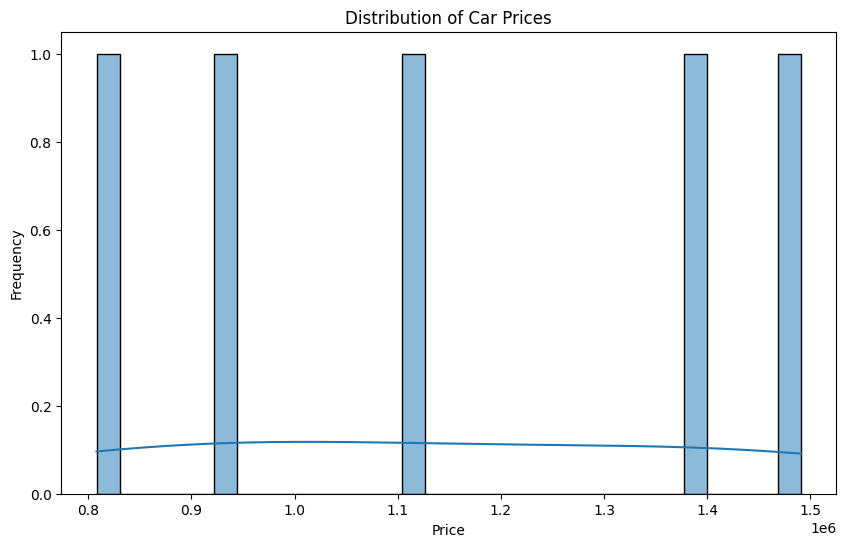

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


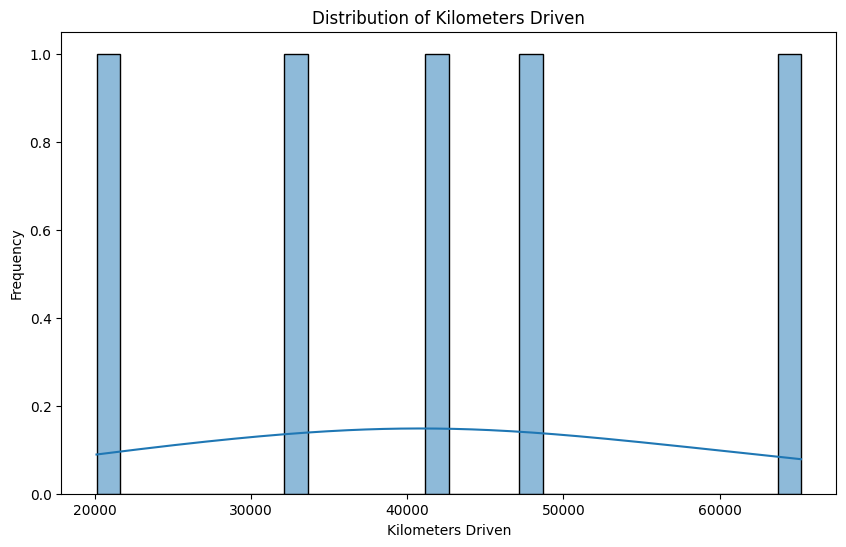

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Kilometers Driven'], bins=30, kde=True)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()


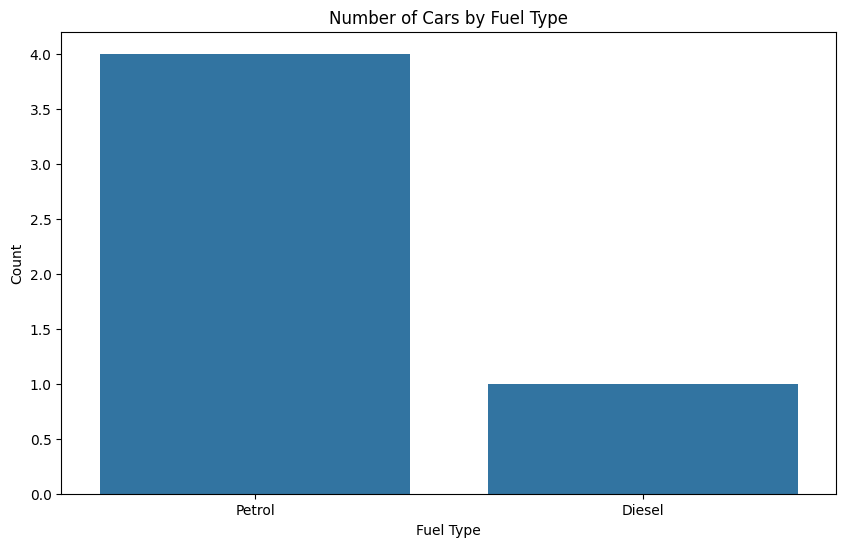

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Fuel Type', data=df)
plt.title('Number of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()


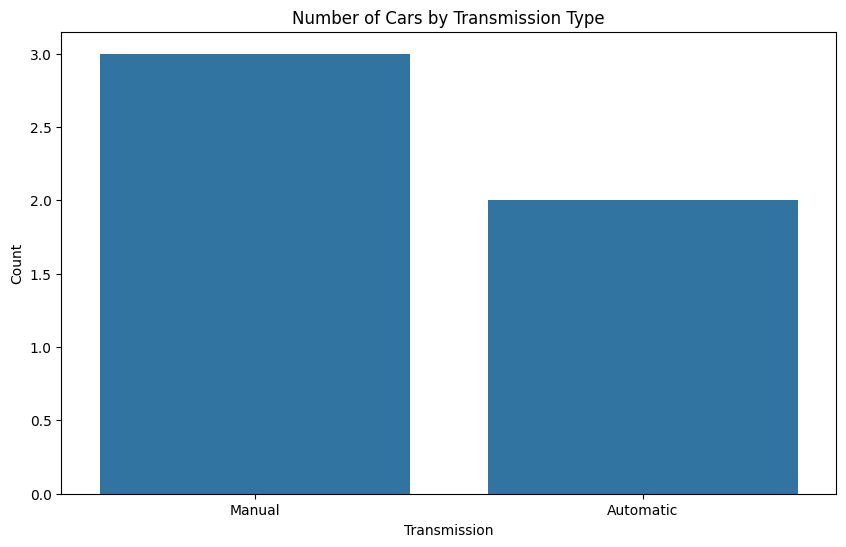

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Transmission', data=df)
plt.title('Number of Cars by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.show()


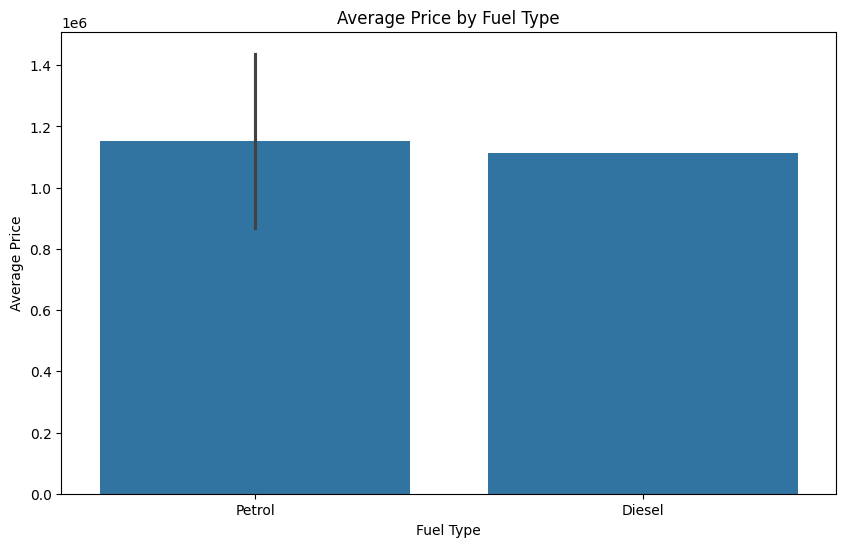

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Fuel Type', y='Price', data=df, estimator='mean')
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()


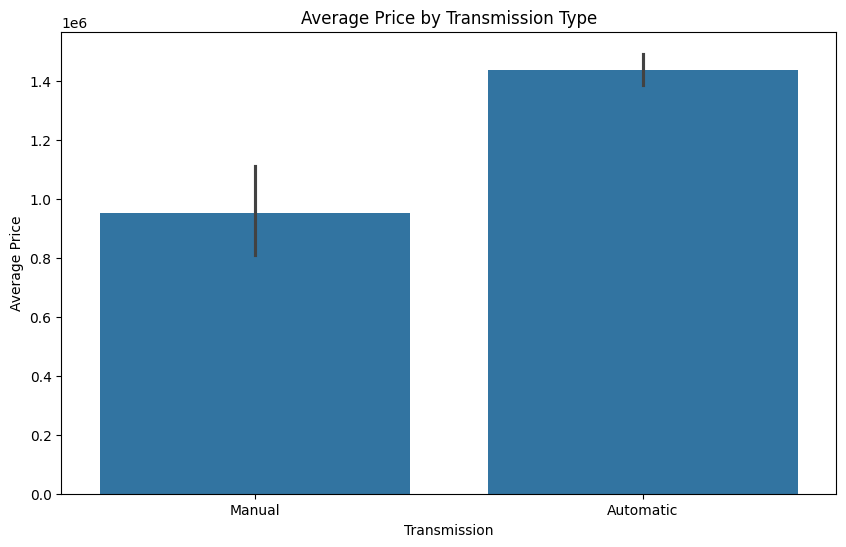

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Transmission', y='Price', data=df, estimator='mean')
plt.title('Average Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Average Price')
plt.show()


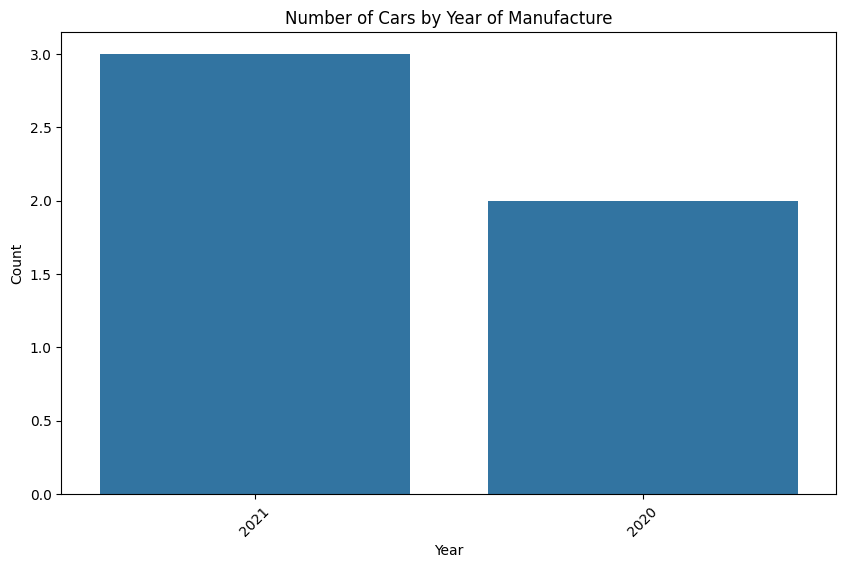

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df, order=df['Year'].value_counts().index)
plt.title('Number of Cars by Year of Manufacture')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
